In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_subvencions = pd.read_csv('../data/Subvencions_atorgades_AjuntBCN_i_Instituts.csv')

In [6]:
df_subvencions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61696 entries, 0 to 61695
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entitat_Municipal        61696 non-null  object 
 1   Organ_Gestor             54915 non-null  object 
 2   Beneficiari              61696 non-null  object 
 3   NIF_CIF                  61696 non-null  object 
 4   Tipologia_De_Subvencio   61132 non-null  object 
 5   Codi_De_Subvencio        61696 non-null  object 
 6   Objecte                  61696 non-null  object 
 7   Data_Convocatoria        61696 non-null  object 
 8   Data_Atorgament          61696 non-null  object 
 9   Import_Sollicitat        61696 non-null  float64
 10  Import_Total_Projecte    61696 non-null  float64
 11  Import_Atorgat_Inicial   61696 non-null  float64
 12  Import_Reintegrat_Total  61696 non-null  float64
dtypes: float64(4), object(9)
memory usage: 6.1+ MB


In [7]:
print(df_subvencions.shape)
df_subvencions.head(2)

(61696, 13)


,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
0,Ajuntament de Barcelona,"Gerència Drets de Ciutadania, Participació i T...",ASSOCIACIO UCRAINESA DJERELO,G65874968,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...,19S00465,V Ucrania Fest,24.01.2019,16.09.2019,5000.0,14900.0,4500.0,0.0
1,Ajuntament de Barcelona,Gerència de Drets Socials,PROJECTE DELS NOMS - HISPANOSIDA,G60396280,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. GERÈ...,19S00469,26è Memorial Internacional de la Sida,24.01.2019,12.09.2019,4000.0,13000.0,3000.0,0.0


In [8]:
df_subvencions.describe().T

,count,mean,std,min,25%,50%,75%,max
Import_Sollicitat,61696.0,32622.580025,1.188566e+06,0.0,1000.0,3200.000,9000.0,1.620830e+08
Import_Total_Projecte,61696.0,37172.735972,6.939191e+05,0.0,1500.0,6412.705,20000.0,1.506817e+08
Import_Atorgat_Inicial,61696.0,117470.655703,2.112606e+06,-4700000.0,1000.0,2250.000,6000.0,1.607830e+08
Import_Reintegrat_Total,61696.0,106.704832,5.104336e+03,0.0,0.0,0.000,0.0,1.185303e+06


In [9]:
df_subvencions.describe(include=object).T

,count,unique,top,freq
Entitat_Municipal,61696,12,Ajuntament de Barcelona,46213
Organ_Gestor,54915,48,"Gerència d’Àrea d’Economia, Recursos i Promoci...",9349
Beneficiari,61696,25247,INST. MPAL. CULTURA (ICUB),220
NIF_CIF,61696,18885,P5890006I,225
Tipologia_De_Subvencio,61132,260,AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...,5795
Codi_De_Subvencio,61696,49175,23S00061,7
Objecte,61696,34016,POCS RECURSOS 2019,5795
Data_Convocatoria,61696,112,00.00.0000,27889
Data_Atorgament,61696,1339,17.12.2019,5821


In [10]:
df_subvencions[df_subvencions.duplicated(keep=False)]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total


In [11]:
df_subvencions.isnull().sum()

Entitat_Municipal             0
Organ_Gestor               6781
Beneficiari                   0
NIF_CIF                       0
Tipologia_De_Subvencio      564
Codi_De_Subvencio             0
Objecte                       0
Data_Convocatoria             0
Data_Atorgament               0
Import_Sollicitat             0
Import_Total_Projecte         0
Import_Atorgat_Inicial        0
Import_Reintegrat_Total       0
dtype: int64

In [12]:
df_subvencions['Organ_Gestor'].value_counts()

Organ_Gestor
Gerència d’Àrea d’Economia, Recursos i Promoció Econòmica                9349
Gerència de Presidència i Economia                                       6072
Institut de Cultura de Barcelona                                         5282
Gerència Àrea D.Socials,Salut,Cooperac. i Comunit.                       3397
Gerència Drets de Ciutadania, Participació i Transparència               3239
Gerència Àrea Cultura,Educació,Esports i Cicles V.                       2213
Gerència d'Area de Drets Socials, Justícia Global, Feminismes i LGTBI    1842
Districte de Ciutat Vella                                                1602
Districte d'Horta-Guinardó                                               1559
Districte de Sant Martí                                                  1477
Districte de Sants-Montjuic                                              1377
Districte de Sant Andreu                                                 1328
Districte de Nou Barris                            

In [13]:
df_subvencions[df_subvencions['Organ_Gestor'].isnull()]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
640,Institut Municipal d'Educació,NaN,NATALIA ANGLES I BERNAL,48023217E,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00158,BECA FP DUAL NATALIA ANGLES I BERNAL 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2521.13,0.0
641,Institut Municipal d'Educació,NaN,BERTA ARIAS RUESGA,49292612R,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00159,BECA FP DUAL BERTA ARIAS RUESGA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2499.44,0.0
642,Institut Municipal d'Educació,NaN,DEIDRE ATIENZAR CEBRIA,26068801A,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00160,BECA FP DUAL DEIDRE ATIENZAR CEBRIA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,1161.02,0.0
643,Institut Municipal d'Educació,NaN,ARIADNA BIETO I ESTRELLA,23922664L,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00161,BECA FP DUAL ARIADNA BIETO ESTRELLA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,1286.21,0.0
644,Institut Municipal d'Educació,NaN,CABRERA CORONADO,26910572C,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00162,BECA FP DUAL SHEYLA CABRERA CORONADO 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2480.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61691,Institut Municipal Barcelona Esports,NaN,CLUB NATACION BARCELONA,G08533689,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00988,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61692,Institut Municipal Barcelona Esports,NaN,REAL CLUB DE TENIS BARCELONA-1899,G08555278,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00989,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61693,Institut Municipal Barcelona Esports,NaN,Unió Esportiva d'Horta,G08675738,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00991,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,18993.41,18993.41,18993.41,0.0
61694,Institut Municipal Barcelona Esports,NaN,Fed Esp Cat Paralítics Cerebrals,G60121043,SUBVENCIONS DIRECTES (amb o sense CONVENI),21S00311,Conveni DIBA 2020 - Esdeveniments,00.00.0000,06.05.2021,5000.00,5000.00,5000.00,0.0


In [14]:
df_subvencions['Organ_Gestor'].fillna('no_gestor', inplace=True)

C:\Users\harol\AppData\Local\Temp\ipykernel_11552\3572163831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subvencions['Organ_Gestor'].fillna('no_gestor', inplace=True)


In [15]:
df_subvencions['Organ_Gestor'].value_counts(normalize=True)*100

Organ_Gestor
Gerència d’Àrea d’Economia, Recursos i Promoció Econòmica                15.153332
no_gestor                                                                10.990988
Gerència de Presidència i Economia                                        9.841805
Institut de Cultura de Barcelona                                          8.561333
Gerència Àrea D.Socials,Salut,Cooperac. i Comunit.                        5.506030
Gerència Drets de Ciutadania, Participació i Transparència                5.249935
Gerència Àrea Cultura,Educació,Esports i Cicles V.                        3.586942
Gerència d'Area de Drets Socials, Justícia Global, Feminismes i LGTBI     2.985607
Districte de Ciutat Vella                                                 2.596603
Districte d'Horta-Guinardó                                                2.526906
Districte de Sant Martí                                                   2.393996
Districte de Sants-Montjuic                                               

In [16]:
df_subvencions['Tipologia_De_Subvencio'].value_counts()

Tipologia_De_Subvencio
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS     5795
AJUTS                                                               5481
SUBVENCIONS DIRECTES (amb o sense CONVENI)                          5071
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI    2752
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                 2603
                                                                    ... 
CONVOCATÒRIA DRETS SOCIALS I LABORALS DE LES TREBALLADORES SEXUA       1
PROJECTE PILOT AMUNT!                                                  1
Convocatòria planificació, gestió i seguiments PDC 2018                1
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2018. SARRIA- SANT GERVASI         1
CONVOCATÒRIA XIV edició del Premi 25 de Novembre                       1
Name: count, Length: 260, dtype: int64

In [17]:
df_subvencions[df_subvencions['Tipologia_De_Subvencio'].isnull()]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
18782,Ajuntament de Barcelona,Districte de Ciutat Vella,ASS CULTURAL I SOCIAL L'EM I JPC,G64031958,NaN,21S04964,Conveni col·laboració Projecte Ens Raval'EM,00.00.0000,21.10.2021,49630.0,50000.0,49630.0,0.0
18815,Ajuntament de Barcelona,"Gerència d’Àrea de Cultura, Educació, Ciència ...",ASOC EXPANSION DE LA XARXA OBERTA,G65319832,NaN,21S05362,Conveni eXO.cat Xarxa Oberta inclusió digital,00.00.0000,28.06.2021,15075.4,15075.4,15075.4,0.0
18845,Ajuntament de Barcelona,"Gerència d’Àrea d’Economia, Recursos i Promoci...",ASSOCIACIÓ CAMBRA LGTBIQ CATALUNYA,G64717812,NaN,21S05178,Promoció i dinamització BCN LGTBIQ (ACEGAL),00.00.0000,09.09.2021,66905.0,245735.0,116905.0,0.0
18846,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",ASSOCIACIO SETEM CATALUNYA,G59523910,NaN,21S05179,Conveni Setem 2021,00.00.0000,08.07.2021,65000.0,130000.0,65000.0,0.0
18882,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",ASSOC. CA LA DONA,G58505280,NaN,21S05210,Conveni Ca la Dona 2021,00.00.0000,01.07.2021,31050.0,34500.0,31050.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59845,Ajuntament de Barcelona,Districte de Gràcia,CERCLE DE GRÀCIA,G08534984,NaN,21S13098,Promoció Activitats Culturals Cercle Catòlic,00.00.0000,27.12.2021,13000.0,0.0,13000.0,0.0
60744,Ajuntament de Barcelona,"Gerència d’Àrea d’Economia, Recursos i Promoci...",FUNDACIÓN SHIP2B,G66220286,NaN,22S08583,IX Ship2B Impact Forum,00.00.0000,29.09.2022,50000.0,404722.9,50000.0,0.0
60788,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",PALLASSOS SENSE FRONTERES,G60343951,NaN,22S09646,PSF -Suport a infància refugiada i vulnerable ...,00.00.0000,27.12.2022,29900.0,55645.0,29900.0,0.0
60789,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",FUNDACIO BARCELONACTUA,G66571746,NaN,22S09648,Conveni BCN Actua 2022,00.00.0000,22.12.2022,150000.0,187500.0,150000.0,0.0


In [18]:
df_subvencions['Tipologia_De_Subvencio'].fillna('no_tipo', inplace=True)

C:\Users\harol\AppData\Local\Temp\ipykernel_11552\4190768758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subvencions['Tipologia_De_Subvencio'].fillna('no_tipo', inplace=True)


In [19]:
df_subvencions['Tipologia_De_Subvencio'].value_counts(normalize=True)

Tipologia_De_Subvencio
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS     0.093928
AJUTS                                                               0.088839
SUBVENCIONS DIRECTES (amb o sense CONVENI)                          0.082193
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI    0.044606
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                 0.042191
                                                                      ...   
CONVOCATÒRIA DRETS SOCIALS I LABORALS DE LES TREBALLADORES SEXUA    0.000016
PROJECTE PILOT AMUNT!                                               0.000016
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2018. SARRIA- SANT GERVASI      0.000016
Convocatòria planificació, gestió i seguiments PDC 2018             0.000016
CONVOCATÒRIA XIV edició del Premi 25 de Novembre                    0.000016
Name: proportion, Length: 261, dtype: float64

In [72]:
df_subvencions['Entitat_Municipal'].value_counts()

Entitat_Municipal
Ajuntament de Barcelona                                       46213
Institut de Cultura de Barcelona                               6476
Institut Municipal Barcelona Esports                           3599
Institut Barcelona Esports                                     1201
Institut Municipal de persones amb Discapacitat                1060
Institut Municipal de Serveis Socials                           984
Institut Municipal d'Educació                                   603
Institut Municipal de Persones amb Discapacitat                 510
Institut Municipal del Paisatge Urbà i la Qualitat de Vida      386
Institut Municipal de Mercats de Barcelona                      292
Institut Municipal d' Hisenda                                   236
Institut Municipal d'Educació de Barcelona                      136
Name: count, dtype: int64

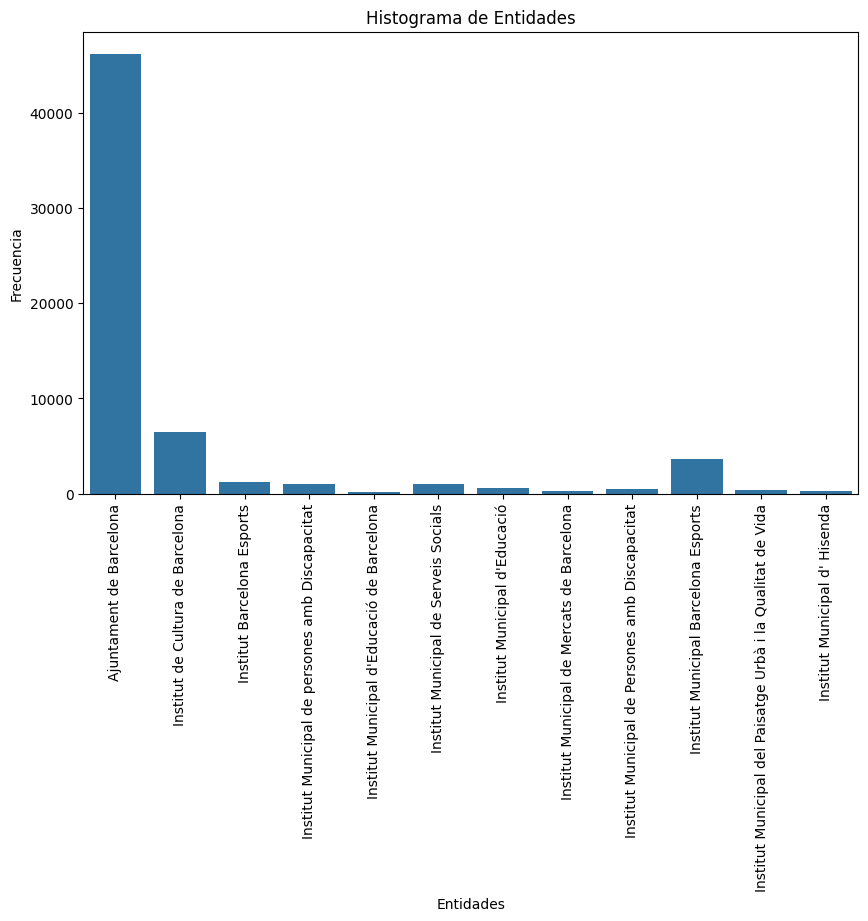

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Entitat_Municipal', data=df_subvencions)
plt.xticks(rotation=90)
plt.title('Histograma de Entidades')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()

In [93]:
df_subvencions['Import_Sollicitat'].value_counts(normalize=True)*100

Import_Sollicitat
0.0       13.984699
1000.0     4.442752
3000.0     3.638810
1500.0     3.363265
6000.0     2.914289
            ...    
5047.2     0.001621
4475.0     0.001621
7967.0     0.001621
7912.0     0.001621
7525.0     0.001621
Name: proportion, Length: 13174, dtype: float64

In [125]:
df_import_solicitado_diferente_cero = df_subvencions[~(df_subvencions['Import_Sollicitat']<=0.09)]

In [129]:
df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']<1]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total


In [131]:
df_import_solicitado_diferente_cero['Import_Sollicitat'].min()
df_import_solicitado_diferente_cero['Import_Sollicitat'].max()

np.float64(162082995.0)

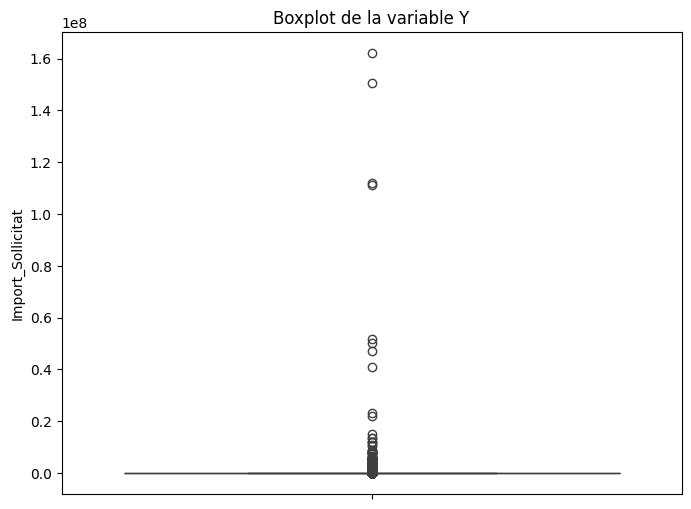

In [132]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_import_solicitado_diferente_cero, y='Import_Sollicitat') 
plt.title('Boxplot de la variable Y')
plt.show()

In [133]:
df_subvencions['Import_Atorgat_Inicial'].value_counts()

Import_Atorgat_Inicial
300.00       6141
1000.00      4409
1500.00      3206
2000.00      2606
3000.00      2426
             ... 
5128.64         1
9424.68         1
9890.76         1
240197.18       1
16150.00        1
Name: count, Length: 12897, dtype: int64

In [135]:
df_subvencions[df_subvencions['Import_Atorgat_Inicial']<=0]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
645,Institut Municipal d'Educació,no_gestor,INSTITUT INFANCIA I ADOLESCENCIA DE BARCELONA,P5800046D,TRANSFERÈNCIES ENS PÚBLICS I ALTRES,18S00295,ENCOMANA DE GESTIÓ CIIMU 2018-2019,00.00.0000,03.05.2018,0.00,0.00,-6900.00,0.00
857,Ajuntament de Barcelona,Gerència de Política Econòmica i Desenvolupament,DIOMCOOP SCCL,F66976135,SUBVENCIONS NOMINATIVES,17S09881,Conveni amb DIOMCOOP,00.00.0000,29.06.2017,1080688.15,2411854.28,-223609.96,1227.11
1365,Institut Municipal de Persones amb Discapacitat,no_gestor,CALLEJAS JEREZ MIGUEL,77291601D,SUBVENCIONS DIRECTES (amb o sense CONVENI),19S00285,Ajut del programa Atenció a les persones en si...,00.00.0000,08.03.2019,26539.81,26539.81,-18711.07,0.00
1939,Ajuntament de Barcelona,Districte de Sants-Montjuic,MARTI ARROCHA VITALI,53318634B,SUBVENCIONS DIRECTES (amb o sense CONVENI),18S09028,Acord Formatiu FP Dual: alumne MARTÍ ARROCHA V...,00.00.0000,31.07.2018,0.00,2940.00,-1764.00,0.00
1941,Ajuntament de Barcelona,Gerència de Presidència i Economia,ARA ARZA CIA,73139315M,SUBVENCIONS DIRECTES (amb o sense CONVENI),18S15169,Conveni Coop. Educativa Ara Arza (2on periode),00.00.0000,19.09.2018,6700.00,6700.00,-3400.00,0.00
1942,Ajuntament de Barcelona,"Gerència d'Àrea d'Agenda 2030, Transició Digit...",ASOC MUNDIAL DE GRANDES METRÓPOLIS,G65011652,SUBVENCIONS NOMINATIVES,18S15178,Metropolis - Impuls de la governança metropoli...,00.00.0000,27.09.2018,390000.00,780000.00,-26000.00,0.00
1944,Ajuntament de Barcelona,Gerència de Drets Socials,UTE MUNDO SENIOR,U57899791,SUBVENCIONS DIRECTES (amb o sense CONVENI),18S15796,PROGRAMA VACACIONES PARA MAYORES 2018-2019,00.00.0000,29.11.2018,139089.95,139089.95,-31000.71,0.00
1945,Ajuntament de Barcelona,Gerència de Drets Socials,UTE MUNDIPLAN,U87382537,SUBVENCIONS DIRECTES (amb o sense CONVENI),18S15841,PROGRAMA VACACIONES PARA MAYORES 2018-2019,00.00.0000,29.11.2018,105286.15,105286.15,-31585.85,0.00
1946,Ajuntament de Barcelona,Gerència Ecologia Urbana,ESTEFANIA PELLICER MARTINEZ,47665749C,SUBVENCIONS DIRECTES (amb o sense CONVENI),18S15895,Cv_Pràctiques FUNITEC_Estefania Pellicer Martínez,00.00.0000,06.11.2018,9000.00,44660.00,-5500.00,0.00
1947,Ajuntament de Barcelona,Gerència Ecologia Urbana,IGNACIO BARTOLOMÉ ORTA,47187839G,SUBVENCIONS DIRECTES (amb o sense CONVENI),18S15902,Cv_Pràctiques UPC_Ignacio Bartolomé Oltra,00.00.0000,06.11.2018,9000.00,57850.00,-2709.68,0.00


In [136]:
df_importe_inicial_otorgado = df_subvencions[~(df_subvencions['Import_Atorgat_Inicial']<=0)]

In [ ]:
df_importe_inicial_otorgado['Import_Atorgat_Inicial'].value_counts()

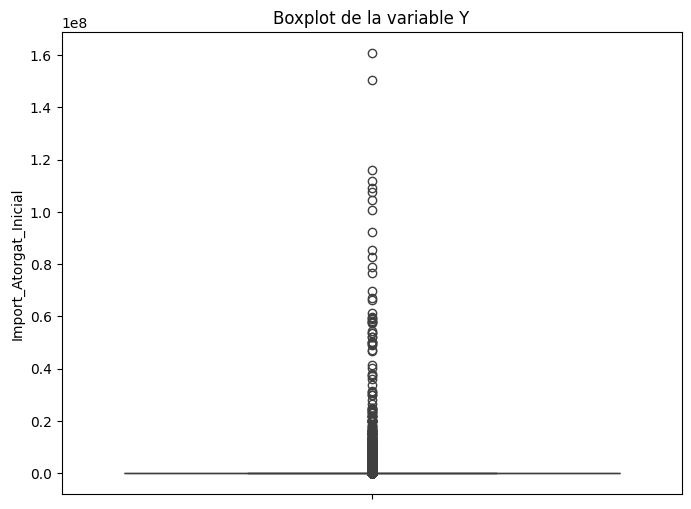

In [139]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_importe_inicial_otorgado, y='Import_Atorgat_Inicial') 
plt.title('Boxplot de la variable Y')
plt.show()

In [141]:
df_subvencions['Import_Total_Projecte'].value_counts(normalize=True)*100

Import_Total_Projecte
0.00        6.313213
6000.00     1.774831
3000.00     1.330718
1000.00     1.132975
10000.00    0.930368
              ...   
1625.16     0.001621
9776.52     0.001621
133.89      0.001621
45085.61    0.001621
15927.52    0.001621
Name: proportion, Length: 27191, dtype: float64

In [153]:
df_importe_total_proyectado_diferente_cero = df_subvencions[~(df_subvencions['Import_Total_Projecte']<1)]

In [151]:
df_subvencions[df_subvencions['Import_Total_Projecte']<0.09].shape

(3895, 13)

In [152]:
df_subvencions[df_subvencions['Import_Total_Projecte']<1].shape

(3896, 13)

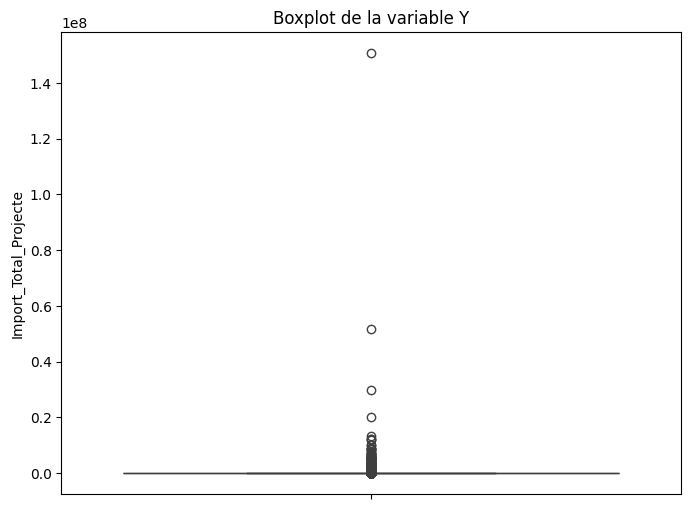

In [154]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_importe_total_proyectado_diferente_cero, y='Import_Total_Projecte') 
plt.title('Boxplot de la variable Y')
plt.show()